In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy.utilities.lambdify import lambdify

## Lagrange interpolation

In [2]:
def lagrange_l(x_ls: list, x_j):
    x = symbols('x')
    lg = 1
    n = len(x_ls)
    for i in range(n):
        if x_j == x_ls[i]:
            continue
        lg *= (x - x_ls[i]) / (x_j - x_ls[i])
    return lg


def lagrange_poly(x, y):
    if len(x) != len(y):
        raise ValueError("x and y are not same length")

    n = len(x)
    # x = symbols('x')

    L = 0
    for i in range(n):
        L += y[i] * lagrange_l(x, x[i])
    return L

## Newton Interpolation

In [3]:
def y_diff_table(y: list):
    f_diff = np.zeros(shape=(len(y) - 1, len(y) - 1))
    n = f_diff.shape[0]

    for i in range(n):
        f_diff[0, i] = (y[i+1] - y[i])

    for i in range(1, n):
        for j in range(n-i):
            f_diff[i, j] = f_diff[i-1, j+1] - f_diff[i - 1, j]

    return f_diff


def get_a(x: list, y: list):
    a_table = np.zeros(shape=(len(y) - 1, len(y) - 1))
    n = a_table.shape[0]

    for i in range(n):
        a_table[0, i] = (y[i + 1] - y[i]) / (x[i+1] - x[i])

    for i in range(1, n):
        for j in range(n - i):
            a_table[i, j] = (a_table[i - 1, j + 1] - a_table[i - 1, j]) / (x[i+1+j] - x[j])

    return a_table


def newton_poly(x_ls: list, y_ls: list):
    if len(x_ls) != len(y_ls):
        raise TypeError("x and y must be same size")

    n = len(x_ls)

    x = symbols('x')
    N = 0
    a_table = get_a(x_ls, y_ls)
    for i in range(n):
        if i == 0:
            N += y_ls[0]
            continue
        x_poly = 1
        for j in range(i):
            x_poly *= (x-x_ls[j])

        N += a_table[i-1, 0] * x_poly

    return N

In [4]:
class tests:
    x_1 = [2, 4, 5]
    y_1 = [1, 15, 28]
    point_1 = 3

    x_2 = [5, 6, 9, 11]
    y_2 = [12, 13, 14, 16]
    point_2 = 7

    x_3 = [-5, -1, 0, 2]
    y_3 = [-2, 6, 1, 3]
    point_3 = 1

    x_4 = [0, 1, 2, 3]
    y_4 = [5, 1, 7, 29]
    point_4 = 2.5

    x_5 = [0.1, 0.5, 0.7, 1.2, 1.5]
    y_5 = [1.2, 2.7, 3.8, 4.7, 6]
    point_5 = 0.8
    
    x_6 = [3/2, -1/3, 0, 1/6, 0.5]
    y_6 = [-1, -np.sqrt(3)/2, 0, 0.5, 1]
    point_6 = 0.25

### Least squares method

In [5]:
def sum_of_pow(x, pow):
    n = x.shape[0]
    sum = 0
    for i in range(n):
        sum += np.power(x[i], pow)
    return sum


def sum_x_y_pows(x, y, pow):
    n = x.shape[0]
    sum = 0

    for i in range(n):
        sum += y[i] * np.power(x[i], pow)
    return sum


def min_square(x, y, m):
    if y.shape[0] < m:
        raise Exception("Low size")

    if x.shape[0] != y.shape[0]:
        raise Exception("size error")
    n = x.shape[0]

    A = np.zeros(shape=(m+1, m+1))
    for i in range(m+1):
        for j in range(m+1):
            A[i, j] = sum_of_pow(x, i+j)

    b = np.zeros(shape=m + 1)
    for i in range(m+1):
        b[i] = sum_x_y_pows(x, y, i)

    a_vec = np.linalg.solve(A, b)
    return a_vec

def get_best_approx_poly(x, y):
    all_polys = list()
    for i in range(1, x.shape[0]):
            all_polys.append(min_square(x, y, i))
    return all_polys

## Tests examples

### Test 1

In [6]:
x = tests.x_1
y = tests.y_1
x_var = symbols('x')
point = tests.point_1


newton = newton_poly(x, y)
lagrange = lagrange_poly(x, y)

print(f"\tData:\n"
      f"x = {x}\n"
      f"y = {y}")

print('-' * 80)

print(f'\tLagrange interpolation polynomial:\nL(x) = {lagrange}')
print(f'Interpolation point: x = {point}')
print(f'Lagrange poly result on x = {point}\nL({point}) = {float(lagrange.subs(x_var, point)):.4f}')

print('-' * 80)

print(f'\tNewton interpolation polynomial:\nN(x) = {newton}')
print(f'Interpolation point: x = {point}')
print(f'Newton poly result on x = {point}\nN({point}) = {float(newton.subs(x_var, point)):.4f}')

	Data:
x = [2, 4, 5]
y = [1, 15, 28]
--------------------------------------------------------------------------------
	Lagrange interpolation polynomial:
L(x) = (5/3 - x/3)*(2 - x/2) + 15*(5 - x)*(x/2 - 1) + 28*(x/3 - 2/3)*(x - 4)
Interpolation point: x = 3
Lagrange poly result on x = 3
L(3) = 6.0000
--------------------------------------------------------------------------------
	Newton interpolation polynomial:
N(x) = 7.0*x + 2.0*(x - 4)*(x - 2) - 13.0
Interpolation point: x = 3
Newton poly result on x = 3
N(3) = 6.0000


### Lagrange Polynomial

In [7]:
lagrange

(5/3 - x/3)*(2 - x/2) + 15*(5 - x)*(x/2 - 1) + 28*(x/3 - 2/3)*(x - 4)

In [8]:
simplify(lagrange)

2*x**2 - 5*x + 3

### Newton Polynomial

In [9]:
newton

7.0*x + 2.0*(x - 4)*(x - 2) - 13.0

In [10]:
simplify(newton)

2.0*x**2 - 5.0*x + 3.0

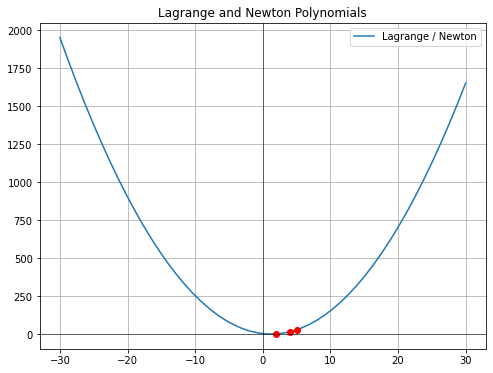

In [11]:
# plt.style.use('seaborn-poster')
X = np.linspace(-30, 30, 50, endpoint=True)
L = lambdify(x_var, lagrange)
L_y = L(X)
N = lambdify(x_var, newton)
N_y = N(X)

fig = plt.figure(figsize=(8, 6))
# lagrange function
plt.plot(X, L_y, label='Lagrange / Newton')

# print interpolation points
plt.plot(x, y, 'ko', c='red')
# axes
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)
plt.grid()

plt.title('Lagrange and Newton Polynomials')
plt.legend()
plt.show()

### Найдем значение в точке

Point!
x = 3
L(3) = 6.0
N(3) = 6.0


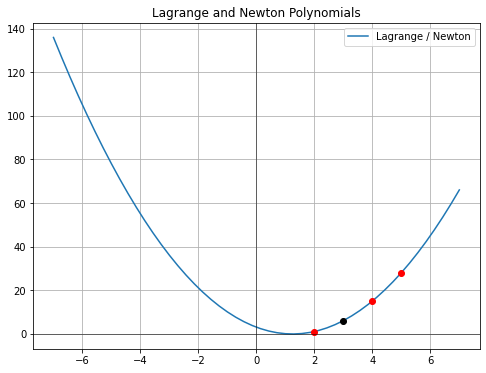

In [12]:
point_x = tests.point_1
print(f"Point!\nx = {point_x}")

point_y_lagr = L(point_x)
point_y_newt = N(point_x)
print(f'L({point_x}) = {point_y_lagr}')
print(f'N({point_x}) = {point_y_newt}')

X = np.linspace(-7, 7, 50, endpoint=True)
L_y = L(X)

fig = plt.figure(figsize=(8, 6))
# lagrange function
plt.plot(X, L_y, label='Lagrange / Newton')

# print interpolation points
plt.plot(point_x, point_y_lagr, 'ko', c='black')
plt.plot(x, y, 'ko', c='red')
# axes
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)

plt.grid()

plt.title('Lagrange and Newton Polynomials')
plt.legend()
plt.show()

## Best apporximation

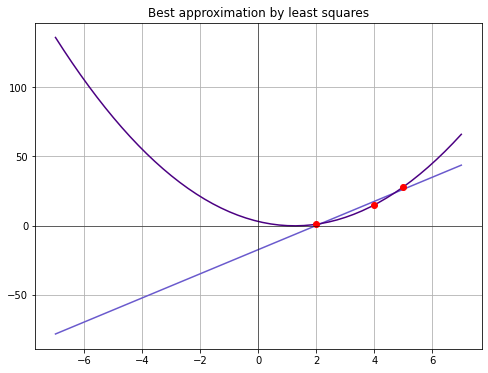

In [13]:
import numpy
x = np.array(tests.x_1)
y = np.array(tests.y_1)


x_var = symbols('x')
all_best = get_best_approx_poly(x, y)
fig = plt.figure(figsize=(8, 6))
for i, koef in enumerate(all_best):
    col = ""
    if i == 0:
        col = 'slateblue'
    elif i == 1:
        col = 'indigo'
    elif i == 2:
        col = 'darkviolet'
    elif col == 3:
        col = 'violet'
    else:
        col = 'magenta'
    
    poly = numpy.polynomial.polynomial.Polynomial(koef)
    L = np.linspace(-7, 7)
    y = poly(L)
    plt.plot(L, y, color = col)
plt.grid()
plt.plot(tests.x_1, tests.y_1, 'ko', c='red')
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)
plt.title("Best approximation by least squares")
plt.show()

In [14]:
numpy.polynomial.polynomial.Polynomial(all_best[0])

Polynomial([-17.28571429,   8.71428571], domain=[-1,  1], window=[-1,  1])

In [15]:
numpy.polynomial.polynomial.Polynomial(all_best[1])

Polynomial([ 3., -5.,  2.], domain=[-1,  1], window=[-1,  1])

### Test 2

In [16]:
x = tests.x_2
y = tests.y_2
point = tests.point_2
x_var = symbols('x')

newton = newton_poly(x, y)
lagrange = lagrange_poly(x, y)

print(f"\tData:\n"
      f"x = {x}\n"
      f"y = {y}")

print('-' * 80)

print(f'\tLagrange interpolation polynomial:\nL(x) = {lagrange}')
print(f'Interpolation point: x = {point}')
print(f'Lagrange poly result on x = {point}\nL({point}) = {float(lagrange.subs(x_var, point)):.4f}')

print('-' * 80)

print(f'\tNewton interpolation polynomial:\nN(x) = {newton}')
print(f'Interpolation point: x = {point}')
print(f'Newton poly result on x = {point}\nN({point}) = {float(newton.subs(x_var, point)):.4f}')

	Data:
x = [5, 6, 9, 11]
y = [12, 13, 14, 16]
--------------------------------------------------------------------------------
	Lagrange interpolation polynomial:
L(x) = 12*(11/6 - x/6)*(9/4 - x/4)*(6 - x) + 13*(11/5 - x/5)*(3 - x/3)*(x - 5) + 14*(11/2 - x/2)*(x/4 - 5/4)*(x/3 - 2) + 16*(x/6 - 5/6)*(x/5 - 6/5)*(x/2 - 9/2)
Interpolation point: x = 7
Lagrange poly result on x = 7
L(7) = 13.4667
--------------------------------------------------------------------------------
	Newton interpolation polynomial:
N(x) = 1.0*x + 0.05*(x - 9)*(x - 6)*(x - 5) - 0.166666666666667*(x - 6)*(x - 5) + 7.0
Interpolation point: x = 7
Newton poly result on x = 7
N(7) = 13.4667


### Lagrange Polynomial

In [17]:
lagrange

12*(11/6 - x/6)*(9/4 - x/4)*(6 - x) + 13*(11/5 - x/5)*(3 - x/3)*(x - 5) + 14*(11/2 - x/2)*(x/4 - 5/4)*(x/3 - 2) + 16*(x/6 - 5/6)*(x/5 - 6/5)*(x/2 - 9/2)

In [18]:
simplify(lagrange)

x**3/20 - 7*x**2/6 + 557*x/60 - 23/2

### Newton Polynomial

In [19]:
newton

1.0*x + 0.05*(x - 9)*(x - 6)*(x - 5) - 0.166666666666667*(x - 6)*(x - 5) + 7.0

In [20]:
simplify(newton)

0.05*x**3 - 1.16666666666667*x**2 + 9.28333333333333*x - 11.5

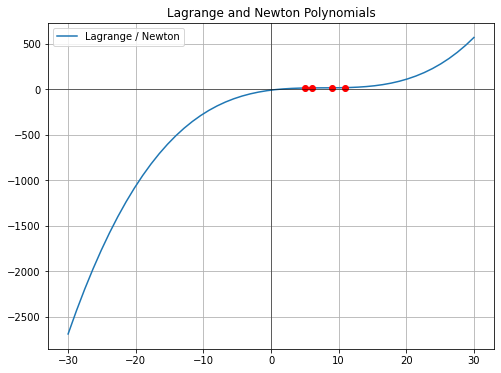

In [21]:
# plt.style.use('seaborn-poster')
X = np.linspace(-30, 30, 50, endpoint=True)
L = lambdify(x_var, lagrange)
L_y = L(X)
N = lambdify(x_var, newton)
N_y = N(X)

fig = plt.figure(figsize=(8, 6))
# lagrange function
plt.plot(X, L_y, label='Lagrange / Newton')

# print interpolation points
plt.plot(x, y, 'ko', c='red')
# axes
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)
plt.grid()

plt.title('Lagrange and Newton Polynomials')
plt.legend()
plt.show()

### Найдем значение в точке

Point!
x = 7
L(7) = 13.466666666666669
N(7) = 13.466666666666665


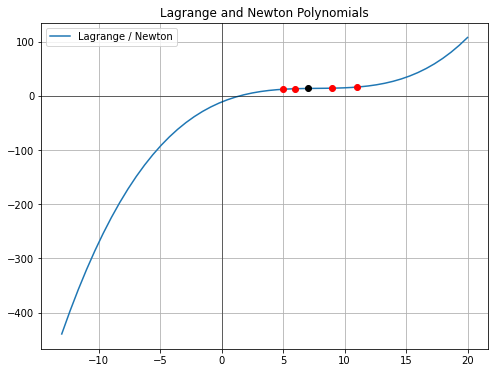

In [22]:
point_x = tests.point_2
print(f"Point!\nx = {point_x}")

point_y_lagr = L(point_x)
point_y_newt = N(point_x)
print(f'L({point_x}) = {point_y_lagr}')
print(f'N({point_x}) = {point_y_newt}')

X = np.linspace(-13, 20, 50, endpoint=True)
L_y = L(X)

fig = plt.figure(figsize=(8, 6))
# lagrange function
plt.plot(X, L_y, label='Lagrange / Newton')

# print interpolation points
plt.plot(point_x, point_y_lagr, 'ko', c='black')
plt.plot(x, y, 'ko', c='red')
# axes
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)

plt.grid()

plt.title('Lagrange and Newton Polynomials')
plt.legend()
plt.show()

### Best approximation

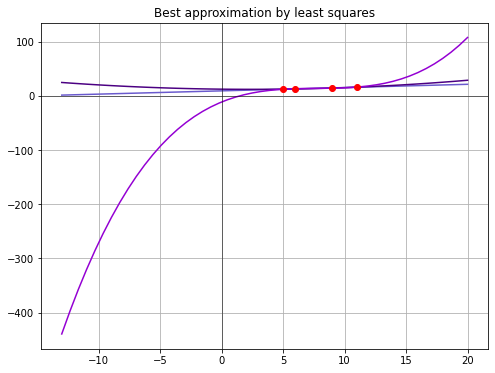

In [23]:
import numpy
x = np.array(tests.x_2)
y = np.array(tests.y_2)


x_var = symbols('x')
all_best = get_best_approx_poly(x, y)
fig = plt.figure(figsize=(8, 6))
for i, koef in enumerate(all_best):
    col = ""
    if i == 0:
        col = 'slateblue'
    elif i == 1:
        col = 'indigo'
    elif i == 2:
        col = 'darkviolet'
    elif col == 3:
        col = 'violet'
    else:
        col = 'magenta'
    
    poly = numpy.polynomial.polynomial.Polynomial(koef)
    L = np.linspace(-13, 20)
    y = poly(L)
    plt.plot(L, y, color = col)
plt.grid()
plt.plot(tests.x_2, tests.y_2, 'ko', c='red')
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)
plt.title("Best approximation by least squares")
plt.show()

In [24]:
numpy.polynomial.polynomial.Polynomial(all_best[0])

Polynomial([9.06593407, 0.6043956 ], domain=[-1,  1], window=[-1,  1])

In [25]:
numpy.polynomial.polynomial.Polynomial(all_best[1])

Polynomial([12.16949153, -0.25141243,  0.05367232], domain=[-1,  1], window=[-1,  1])

In [26]:
numpy.polynomial.polynomial.Polynomial(all_best[2])

Polynomial([-11.5       ,   9.28333333,  -1.16666667,   0.05      ], domain=[-1,  1], window=[-1,  1])

### Test 3

In [27]:
x = tests.x_3
y = tests.y_3
point = tests.point_3
x_var = symbols('x')

newton = newton_poly(x, y)
lagrange = lagrange_poly(x, y)

print(f"\tData:\n"
      f"x = {x}\n"
      f"y = {y}")

print('-' * 80)

print(f'\tLagrange interpolation polynomial:\nL(x) = {lagrange}')
print(f'Interpolation point: x = {point}')
print(f'Lagrange poly result on x = {point}\nL({point}) = {float(lagrange.subs(x_var, point)):.4f}')

print('-' * 80)

print(f'\tNewton interpolation polynomial:\nN(x) = {newton}')
print(f'Interpolation point: x = {point}')
print(f'Newton poly result on x = {point}\nN({point}) = {float(newton.subs(x_var, point)):.4f}')

	Data:
x = [-5, -1, 0, 2]
y = [-2, 6, 1, 3]
--------------------------------------------------------------------------------
	Lagrange interpolation polynomial:
L(x) = 2*x*(2/7 - x/7)*(-x/4 - 1/4)/5 - 6*x*(2/3 - x/3)*(x/4 + 5/4) + 3*x*(x/7 + 5/7)*(x/3 + 1/3)/2 + (1 - x/2)*(x/5 + 1)*(x + 1)
Interpolation point: x = 1
Lagrange poly result on x = 1
L(1) = -0.9714
--------------------------------------------------------------------------------
	Newton interpolation polynomial:
N(x) = 0.485714285714286*x*(x + 1)*(x + 5) + 2.0*x - 1.4*(x + 1)*(x + 5) + 8.0
Interpolation point: x = 1
Newton poly result on x = 1
N(1) = -0.9714


### Lagrange Polynomial

In [28]:
lagrange

2*x*(2/7 - x/7)*(-x/4 - 1/4)/5 - 6*x*(2/3 - x/3)*(x/4 + 5/4) + 3*x*(x/7 + 5/7)*(x/3 + 1/3)/2 + (1 - x/2)*(x/5 + 1)*(x + 1)

In [29]:
simplify(lagrange)

17*x**3/35 + 53*x**2/35 - 139*x/35 + 1

### Newton Polynomial

In [30]:
newton

0.485714285714286*x*(x + 1)*(x + 5) + 2.0*x - 1.4*(x + 1)*(x + 5) + 8.0

In [31]:
simplify(newton)

0.485714285714286*x**3 + 1.51428571428571*x**2 - 3.97142857142857*x + 1.0

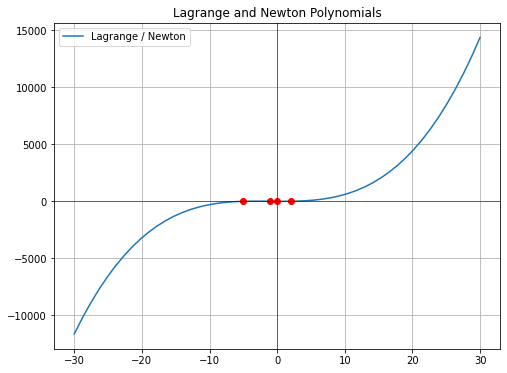

In [32]:
# plt.style.use('seaborn-poster')
X = np.linspace(-30, 30, 50, endpoint=True)
L = lambdify(x_var, lagrange)
L_y = L(X)
N = lambdify(x_var, newton)
N_y = N(X)

fig = plt.figure(figsize=(8, 6))
# lagrange function
plt.plot(X, L_y, label='Lagrange / Newton')

# print interpolation points
plt.plot(x, y, 'ko', c='red')
# axes
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)
plt.grid()

plt.title('Lagrange and Newton Polynomials')
plt.legend()
plt.show()

### Найдем значение в точке

Point!
x = 1
L(1) = -0.9714285714285713
N(1) = -0.9714285714285644


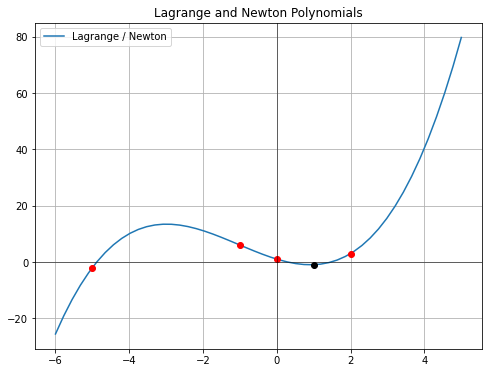

In [33]:
point_x = tests.point_3
print(f"Point!\nx = {point_x}")

point_y_lagr = L(point_x)
point_y_newt = N(point_x)
print(f'L({point_x}) = {point_y_lagr}')
print(f'N({point_x}) = {point_y_newt}')

X = np.linspace(-6, 5, 50, endpoint=True)
L_y = L(X)

fig = plt.figure(figsize=(8, 6))
# lagrange function
plt.plot(X, L_y, label='Lagrange / Newton')

# print interpolation points
plt.plot(point_x, point_y_lagr, 'ko', c='black')
plt.plot(x, y, 'ko', c='red')
# axes
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)

plt.grid()

plt.title('Lagrange and Newton Polynomials')
plt.legend()
plt.show()

### Best approximation

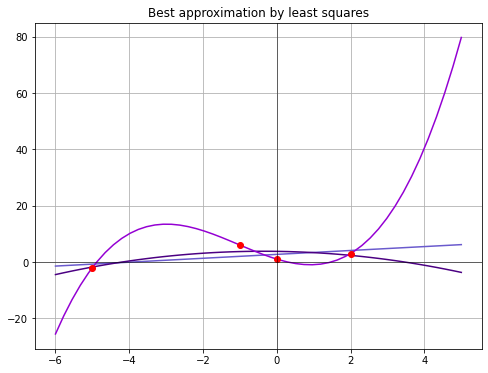

In [34]:
import numpy
x = np.array(tests.x_3)
y = np.array(tests.y_3)


x_var = symbols('x')
all_best = get_best_approx_poly(x, y)
fig = plt.figure(figsize=(8, 6))
for i, koef in enumerate(all_best):
    col = ""
    if i == 0:
        col = 'slateblue'
    elif i == 1:
        col = 'indigo'
    elif i == 2:
        col = 'darkviolet'
    elif col == 3:
        col = 'violet'
    else:
        col = 'magenta'
    
    poly = numpy.polynomial.polynomial.Polynomial(koef)
    L = np.linspace(-6, 5)
    y = poly(L)
    plt.plot(L, y, color = col)
plt.grid()
plt.plot(tests.x_3, tests.y_3, 'ko', c='red')
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)
plt.title("Best approximation by least squares")
plt.show()

In [35]:
numpy.polynomial.polynomial.Polynomial(all_best[0])

Polynomial([2.69230769, 0.69230769], domain=[-1,  1], window=[-1,  1])

In [36]:
numpy.polynomial.polynomial.Polynomial(all_best[1])

Polynomial([ 3.76565526, -0.19044545, -0.26081343], domain=[-1,  1], window=[-1,  1])

In [37]:
numpy.polynomial.polynomial.Polynomial(all_best[2])

Polynomial([ 1.        , -3.97142857,  1.51428571,  0.48571429], domain=[-1,  1], window=[-1,  1])

### Test 4

In [38]:
x = tests.x_4
y = tests.y_4
point = tests.point_4
x_var = symbols('x')

newton = newton_poly(x, y)
lagrange = lagrange_poly(x, y)

print(f"\tData:\n"
      f"x = {x}\n"
      f"y = {y}")

print('-' * 80)

print(f'\tLagrange interpolation polynomial:\nL(x) = {lagrange}')
print(f'Interpolation point: x = {point}')
print(f'Lagrange poly result on x = {point}\nL({point}) = {float(lagrange.subs(x_var, point)):.4f}')

print('-' * 80)

print(f'\tNewton interpolation polynomial:\nN(x) = {newton}')
print(f'Interpolation point: x = {point}')
print(f'Newton poly result on x = {point}\nN({point}) = {float(newton.subs(x_var, point)):.4f}')

	Data:
x = [0, 1, 2, 3]
y = [5, 1, 7, 29]
--------------------------------------------------------------------------------
	Lagrange interpolation polynomial:
L(x) = x*(3/2 - x/2)*(2 - x) + 7*x*(3 - x)*(x - 1)/2 + 29*x*(x/2 - 1/2)*(x - 2)/3 + 5*(1 - x)*(1 - x/2)*(1 - x/3)
Interpolation point: x = 2.5
Lagrange poly result on x = 2.5
L(2.5) = 15.6250
--------------------------------------------------------------------------------
	Newton interpolation polynomial:
N(x) = 1.0*x*(x - 2)*(x - 1) + 5.0*x*(x - 1) - 4.0*x + 5
Interpolation point: x = 2.5
Newton poly result on x = 2.5
N(2.5) = 15.6250


### Lagrange Polynomial

In [39]:
lagrange

x*(3/2 - x/2)*(2 - x) + 7*x*(3 - x)*(x - 1)/2 + 29*x*(x/2 - 1/2)*(x - 2)/3 + 5*(1 - x)*(1 - x/2)*(1 - x/3)

In [40]:
simplify(lagrange)

x**3 + 2*x**2 - 7*x + 5

### Newton Polynomial

In [41]:
newton

1.0*x*(x - 2)*(x - 1) + 5.0*x*(x - 1) - 4.0*x + 5

In [42]:
simplify(newton)

1.0*x**3 + 2.0*x**2 - 7.0*x + 5.0

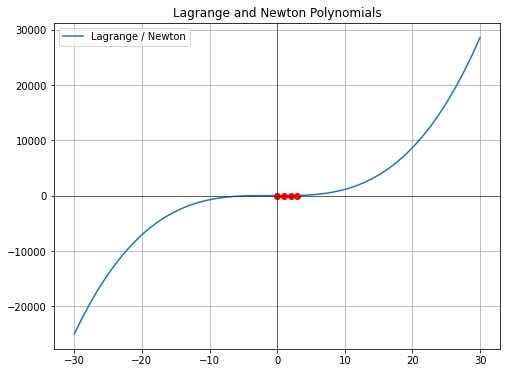

In [43]:
# plt.style.use('seaborn-poster')
X = np.linspace(-30, 30, 50, endpoint=True)
L = lambdify(x_var, lagrange)
L_y = L(X)
N = lambdify(x_var, newton)
N_y = N(X)

fig = plt.figure(figsize=(8, 6))
# lagrange function
plt.plot(X, L_y, label='Lagrange / Newton')

# print interpolation points
plt.plot(x, y, 'ko', c='red')
# axes
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)
plt.grid()

plt.title('Lagrange and Newton Polynomials')
plt.legend()
plt.show()

### Найдем значение в точке

Point!
x = 2.5
L(2.5) = 15.625
N(2.5) = 15.625


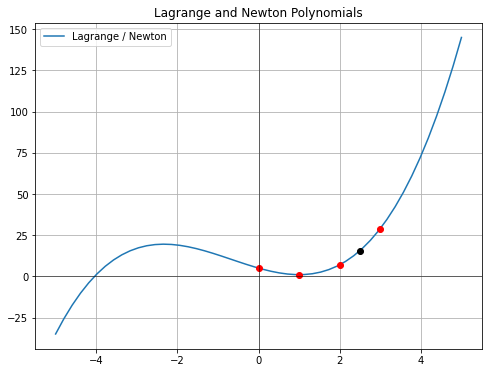

In [44]:
point_x = tests.point_4
print(f"Point!\nx = {point_x}")

point_y_lagr = L(point_x)
point_y_newt = N(point_x)
print(f'L({point_x}) = {point_y_lagr}')
print(f'N({point_x}) = {point_y_newt}')

X = np.linspace(-5, 5, 50, endpoint=True)
L_y = L(X)

fig = plt.figure(figsize=(8, 6))
# lagrange function
plt.plot(X, L_y, label='Lagrange / Newton')

# print interpolation points
plt.plot(point_x, point_y_lagr, 'ko', c='black')
plt.plot(x, y, 'ko', c='red')
# axes
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)

plt.grid()

plt.title('Lagrange and Newton Polynomials')
plt.legend()
plt.show()

### Best approximation

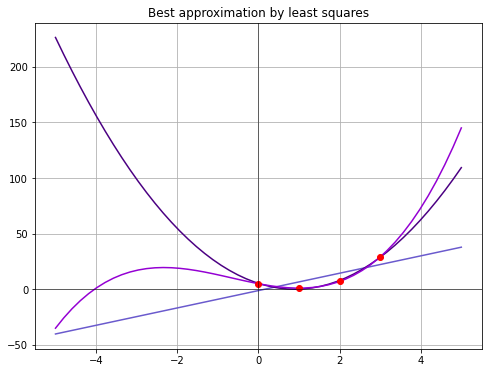

In [45]:
import numpy
x = np.array(tests.x_4)
y = np.array(tests.y_4)


x_var = symbols('x')
all_best = get_best_approx_poly(x, y)
fig = plt.figure(figsize=(8, 6))
for i, koef in enumerate(all_best):
    col = ""
    if i == 0:
        col = 'slateblue'
    elif i == 1:
        col = 'indigo'
    elif i == 2:
        col = 'darkviolet'
    elif col == 3:
        col = 'violet'
    else:
        col = 'magenta'
    
    poly = numpy.polynomial.polynomial.Polynomial(koef)
    L = np.linspace(-5, 5)
    y = poly(L)
    plt.plot(L, y, color = col)
plt.grid()
plt.plot(tests.x_4, tests.y_4, 'ko', c='red')
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)
plt.title("Best approximation by least squares")
plt.show()

In [46]:
numpy.polynomial.polynomial.Polynomial(all_best[0])

Polynomial([-1.2,  7.8], domain=[-1,  1], window=[-1,  1])

In [47]:
numpy.polynomial.polynomial.Polynomial(all_best[1])

Polynomial([  5.3, -11.7,   6.5], domain=[-1,  1], window=[-1,  1])

In [48]:
numpy.polynomial.polynomial.Polynomial(all_best[2])

Polynomial([ 5., -7.,  2.,  1.], domain=[-1,  1], window=[-1,  1])

### Test 5

In [49]:
x = tests.x_5
y = tests.y_5
point = tests.point_5
x_var = symbols('x')

newton = newton_poly(x, y)
lagrange = lagrange_poly(x, y)

print(f"\tData:\n"
      f"x = {x}\n"
      f"y = {y}")

print('-' * 80)

print(f'\tLagrange interpolation polynomial:\nL(x) = {lagrange}')
print(f'Interpolation point: x = {point}')
print(f'Lagrange poly result on x = {point}\nL({point}) = {float(lagrange.subs(x_var, point)):.4f}')

print('-' * 80)

print(f'\tNewton interpolation polynomial:\nN(x) = {newton}')
print(f'Interpolation point: x = {point}')
print(f'Newton poly result on x = {point}\nN({point}) = {float(newton.subs(x_var, point)):.4f}')

	Data:
x = [0.1, 0.5, 0.7, 1.2, 1.5]
y = [1.2, 2.7, 3.8, 4.7, 6]
--------------------------------------------------------------------------------
	Lagrange interpolation polynomial:
L(x) = 1.2*(1.07142857142857 - 0.714285714285714*x)*(1.09090909090909 - 0.909090909090909*x)*(1.16666666666667 - 1.66666666666667*x)*(1.25 - 2.5*x) + 2.7*(1.5 - 1.0*x)*(1.71428571428571 - 1.42857142857143*x)*(3.5 - 5.0*x)*(2.5*x - 0.25) + 3.8*(1.875 - 1.25*x)*(2.4 - 2.0*x)*(1.66666666666667*x - 0.166666666666667)*(5.0*x - 2.5) + 4.7*(5.0 - 3.33333333333333*x)*(0.909090909090909*x - 0.0909090909090909)*(1.42857142857143*x - 0.714285714285714)*(2.0*x - 1.4) + 6*(0.714285714285714*x - 0.0714285714285714)*(1.0*x - 0.5)*(1.25*x - 0.875)*(3.33333333333333*x - 4.0)
Interpolation point: x = 0.8
Lagrange poly result on x = 0.8
L(0.8) = 4.1855
--------------------------------------------------------------------------------
	Newton interpolation polynomial:
N(x) = 3.75*x + 11.3636363636364*(x - 1.2)*(x - 0.7)*(x - 0.5

### Lagrange Polynomial

In [50]:
lagrange

1.2*(1.07142857142857 - 0.714285714285714*x)*(1.09090909090909 - 0.909090909090909*x)*(1.16666666666667 - 1.66666666666667*x)*(1.25 - 2.5*x) + 2.7*(1.5 - 1.0*x)*(1.71428571428571 - 1.42857142857143*x)*(3.5 - 5.0*x)*(2.5*x - 0.25) + 3.8*(1.875 - 1.25*x)*(2.4 - 2.0*x)*(1.66666666666667*x - 0.166666666666667)*(5.0*x - 2.5) + 4.7*(5.0 - 3.33333333333333*x)*(0.909090909090909*x - 0.0909090909090909)*(1.42857142857143*x - 0.714285714285714)*(2.0*x - 1.4) + 6*(0.714285714285714*x - 0.0714285714285714)*(1.0*x - 0.5)*(1.25*x - 0.875)*(3.33333333333333*x - 4.0)

In [51]:
simplify(lagrange)

11.3636363636364*x**4 - 35.8658008658009*x**3 + 35.6785714285714*x**2 - 8.31147186147186*x + 1.70909090909091

### Newton Polynomial

In [52]:
newton

3.75*x + 11.3636363636364*(x - 1.2)*(x - 0.7)*(x - 0.5)*(x - 0.1) - 7.45670995670995*(x - 0.7)*(x - 0.5)*(x - 0.1) + 2.91666666666666*(x - 0.5)*(x - 0.1) + 0.825

In [53]:
simplify(newton)

11.3636363636364*x**4 - 35.8658008658009*x**3 + 35.6785714285714*x**2 - 8.31147186147185*x + 1.70909090909091

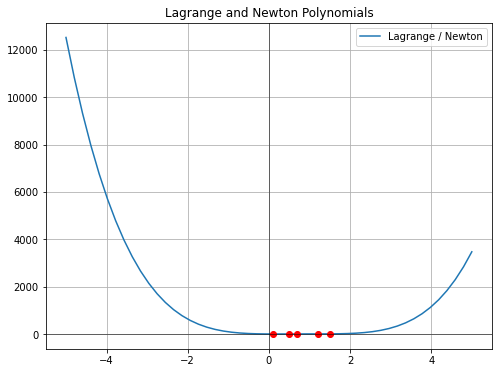

In [54]:
# plt.style.use('seaborn-poster')
X = np.linspace(-5, 5, 50, endpoint=True)
L = lambdify(x_var, lagrange)
L_y = L(X)
N = lambdify(x_var, newton)
N_y = N(X)

fig = plt.figure(figsize=(8, 6))
# lagrange function
plt.plot(X, L_y, label='Lagrange / Newton')

# print interpolation points
plt.plot(x, y, 'ko', c='red')
# axes
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)
plt.grid()

plt.title('Lagrange and Newton Polynomials')
plt.legend()
plt.show()

### Найдем значение в точке

Point!
x = 0.8
L(0.8) = 4.185454545454566
N(0.8) = 4.185454545454544


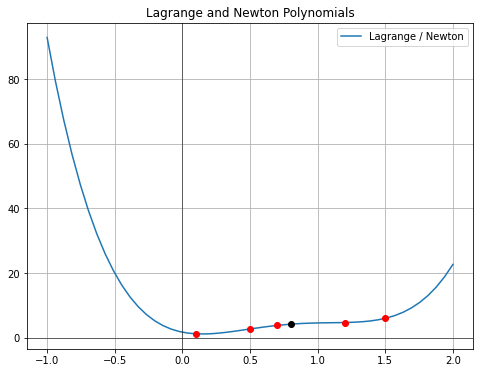

In [55]:
point_x = tests.point_5
print(f"Point!\nx = {point_x}")

point_y_lagr = L(point_x)
point_y_newt = N(point_x)
print(f'L({point_x}) = {point_y_lagr}')
print(f'N({point_x}) = {point_y_newt}')

X = np.linspace(-1, 2, 50, endpoint=True)
L_y = L(X)

fig = plt.figure(figsize=(8, 6))
# lagrange function
plt.plot(X, L_y, label='Lagrange / Newton')

# print interpolation points
plt.plot(point_x, point_y_lagr, 'ko', c='black')
plt.plot(x, y, 'ko', c='red')
# axes
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)

plt.grid()

plt.title('Lagrange and Newton Polynomials')
plt.legend()
plt.show()

### Best approximation

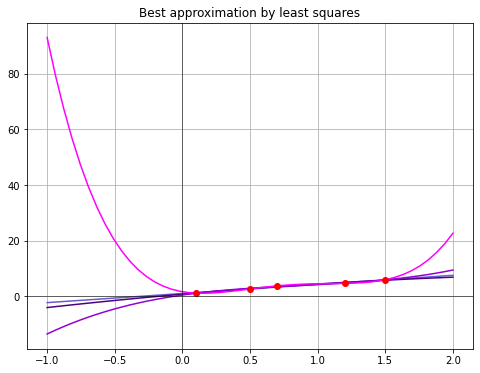

In [56]:
import numpy
x = np.array(tests.x_5)
y = np.array(tests.y_5)


x_var = symbols('x')
all_best = get_best_approx_poly(x, y)
fig = plt.figure(figsize=(8, 6))
for i, koef in enumerate(all_best):
    col = ""
    if i == 0:
        col = 'slateblue'
    elif i == 1:
        col = 'indigo'
    elif i == 2:
        col = 'darkviolet'
    elif col == 3:
        col = 'violet'
    else:
        col = 'magenta'
    
    poly = numpy.polynomial.polynomial.Polynomial(koef)
    L = np.linspace(-1, 2)
    y = poly(L)
    plt.plot(L, y, color = col)
plt.grid()
plt.plot(tests.x_5, tests.y_5, 'ko', c='red')
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)
plt.title("Best approximation by least squares")
plt.show()

In [57]:
numpy.polynomial.polynomial.Polynomial(all_best[0])

Polynomial([1.06709677, 3.26612903], domain=[-1,  1], window=[-1,  1])

In [58]:
numpy.polynomial.polynomial.Polynomial(all_best[1])

Polynomial([ 0.8249956 ,  4.21595106, -0.58305907], domain=[-1,  1], window=[-1,  1])

In [59]:
numpy.polynomial.polynomial.Polynomial(all_best[2])

Polynomial([ 0.52215958,  6.9061403 , -5.11522736,  1.9519473 ], domain=[-1,  1], window=[-1,  1])

### Test 6

In [60]:
x = tests.x_6
y = tests.y_6
point = tests.point_6
x_var = symbols('x')

newton = newton_poly(x, y)
lagrange = lagrange_poly(x, y)

print(f"\tData:\n"
      f"x = {x}\n"
      f"y = {y}")

print('-' * 80)

print(f'\tLagrange interpolation polynomial:\nL(x) = {lagrange}')
print(f'Interpolation point: x = {point}')
print(f'Lagrange poly result on x = {point}\nL({point}) = {float(lagrange.subs(x_var, point)):.4f}')

print('-' * 80)

print(f'\tNewton interpolation polynomial:\nN(x) = {newton}')
print(f'Interpolation point: x = {point}')
print(f'Newton poly result on x = {point}\nN({point}) = {float(newton.subs(x_var, point)):.4f}')

	Data:
x = [1.5, -0.3333333333333333, 0, 0.16666666666666666, 0.5]
y = [-1, -0.8660254037844386, 0, 0.5, 1]
--------------------------------------------------------------------------------
	Lagrange interpolation polynomial:
L(x) = 2.59807621135332*x*(0.333333333333333 - 2.0*x)*(0.6 - 1.2*x)*(0.818181818181818 - 0.545454545454546*x) + 3.0*x*(1.125 - 0.75*x)*(1.5 - 3.0*x)*(2.0*x + 0.666666666666667) + 2.0*x*(1.5 - 1.0*x)*(1.2*x + 0.4)*(3.0*x - 0.5) - 0.666666666666667*x*(0.545454545454546*x + 0.181818181818182)*(0.75*x - 0.125)*(1.0*x - 0.5)
Interpolation point: x = 0.25
Lagrange poly result on x = 0.25
L(0.25) = 0.7033
--------------------------------------------------------------------------------
	Newton interpolation polynomial:
N(x) = 2.62615477786475*x*(x - 1.5)*(x - 0.166666666666667)*(x + 0.333333333333333) - 1.93846231488729*x*(x - 1.5)*(x + 0.333333333333333) - 0.0730770524812153*x - 1.78076884255635*(x - 1.5)*(x + 0.333333333333333) - 0.890384421278177
Interpolation point: x 

### Lagrange Polynomial

In [61]:
lagrange

2.59807621135332*x*(0.333333333333333 - 2.0*x)*(0.6 - 1.2*x)*(0.818181818181818 - 0.545454545454546*x) + 3.0*x*(1.125 - 0.75*x)*(1.5 - 3.0*x)*(2.0*x + 0.666666666666667) + 2.0*x*(1.5 - 1.0*x)*(1.2*x + 0.4)*(3.0*x - 0.5) - 0.666666666666667*x*(0.545454545454546*x + 0.181818181818182)*(0.75*x - 0.125)*(1.0*x - 0.5)

In [62]:
simplify(lagrange)

x*(2.62615477786474*x**3 - 5.44000201870695*x**2 - 0.321665657313188*x + 3.19256398610024)

### Newton Polynomial

In [63]:
newton

2.62615477786475*x*(x - 1.5)*(x - 0.166666666666667)*(x + 0.333333333333333) - 1.93846231488729*x*(x - 1.5)*(x + 0.333333333333333) - 0.0730770524812153*x - 1.78076884255635*(x - 1.5)*(x + 0.333333333333333) - 0.890384421278177

In [64]:
simplify(newton)

2.62615477786475*x**4 - 5.44000201870696*x**3 - 0.321665657313187*x**2 + 3.19256398610024*x + 1.11022302462516e-16

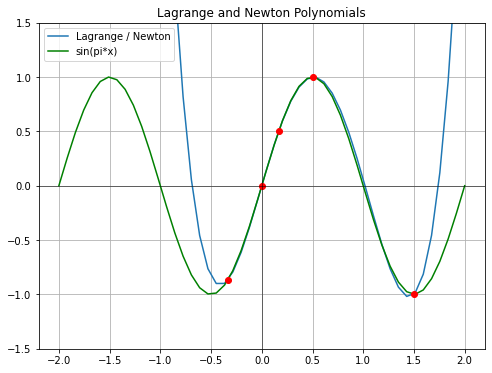

In [65]:
# plt.style.use('seaborn-poster')
X = np.linspace(-2, 2, 50, endpoint=True)
L = lambdify(x_var, lagrange)
L_y = L(X)
N = lambdify(x_var, newton)
N_y = N(X)

fig = plt.figure(figsize=(8, 6))
# lagrange function
plt.plot(X, L_y, label='Lagrange / Newton')

# sin(pi*x)
plt.plot(X, np.sin(np.pi * X), color='green', label='sin(pi*x)')

# print interpolation points
plt.plot(x, y, 'ko', c='red')
# axes
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)
plt.ylim(-1.5, 1.5)
plt.grid()

plt.title('Lagrange and Newton Polynomials')
plt.legend()
plt.show()

### Найдем значение в точке

Point!
x = 0.25
L(0.25) = 0.7032952785017237
N(0.25) = 0.7032952785017196


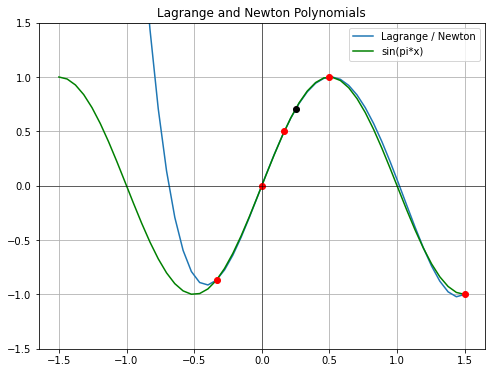

Error = 0.03436384974342177


In [66]:
point_x = tests.point_6
print(f"Point!\nx = {point_x}")

point_y_lagr = L(point_x)
point_y_newt = N(point_x)
print(f'L({point_x}) = {point_y_lagr}')
print(f'N({point_x}) = {point_y_newt}')

X = np.linspace(-1.5, 1.5, 50, endpoint=True)

L_y = L(X)

fig = plt.figure(figsize=(8, 6))

# lagrange function
plt.plot(X, L_y, label='Lagrange / Newton')

plt.plot(X, np.sin(np.pi * X), color='green', label='sin(pi*x)')

# print interpolation points
plt.plot(point_x, point_y_lagr, 'ko', c='black')
plt.plot(x, y, 'ko', c='red')
# axes
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)
plt.ylim(-1.5, 1.5)

plt.grid()

plt.title('Lagrange and Newton Polynomials')
plt.legend()
plt.show()

print(f"Error = {abs(L(point_x*np.pi) - np.sin(point_x*np.pi))}")


### Best approximation

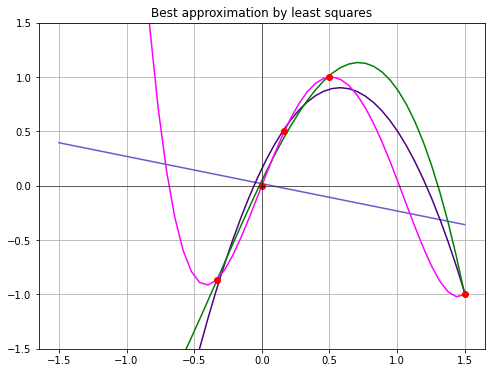

In [67]:
import numpy
x = np.array(tests.x_6)
y = np.array(tests.y_6)


x_var = symbols('x')
all_best = get_best_approx_poly(x, y)
fig = plt.figure(figsize=(8, 6))
for i, koef in enumerate(all_best):
    col = ""
    if i == 0:
        col = 'slateblue'
    elif i == 1:
        col = 'indigo'
    elif i == 2:
        col = 'green'
    elif col == 3:
        col = 'violet'
    else:
        col = 'magenta'
    
    poly = numpy.polynomial.polynomial.Polynomial(koef)
    L = np.linspace(-1.5, 1.5)
    y = poly(L)
    plt.plot(L, y, color = col)
    
plt.ylim(-1.5, 1.5)
plt.grid()
plt.plot(tests.x_6, tests.y_6, 'ko', c='red')
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)
plt.title("Best approximation by least squares")
plt.show()

In [68]:
numpy.polynomial.polynomial.Polynomial(all_best[0])

Polynomial([ 0.01885601, -0.2510757 ], domain=[-1,  1], window=[-1,  1])

In [69]:
numpy.polynomial.polynomial.Polynomial(all_best[1])

Polynomial([ 0.15597576,  2.57505658, -2.22322406], domain=[-1,  1], window=[-1,  1])

In [70]:
numpy.polynomial.polynomial.Polynomial(all_best[2])

Polynomial([ 0.04592726,  2.57896791, -0.83759799, -0.89786831], domain=[-1,  1], window=[-1,  1])

In [71]:
numpy.polynomial.polynomial.Polynomial(all_best[3])

Polynomial([ 9.88763059e-14,  3.19256399e+00, -3.21665657e-01, -5.44000202e+00,
        2.62615478e+00], domain=[-1,  1], window=[-1,  1])

In [72]:
class task:
    k = 10
    m = 1.8

    x = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    p = np.array([0, 0.41, 0.79, 1.13, 1.46, 1.76, 2.04, 2.3, 2.55, 2.79, 3.01])

    y = p + (-1)**k * m
    point = 0.47

### Task

In [73]:
x = task.x
y = task.y
point = tests.point_5
x_var = symbols('x')

newton = newton_poly(x, y)
lagrange = lagrange_poly(x, y)

print(f"\tData:\n"
      f"x = {x}\n"
      f"y = {y}")

print('-' * 80)

print(f'\tLagrange interpolation polynomial:\nL(x) = {lagrange}')
print(f'Interpolation point: x = {point}')
print(f'Lagrange poly result on x = {point}\nL({point}) = {float(lagrange.subs(x_var, point)):.4f}')

print('-' * 80)

print(f'\tNewton interpolation polynomial:\nN(x) = {newton}')
print(f'Interpolation point: x = {point}')
print(f'Newton poly result on x = {point}\nN({point}) = {float(newton.subs(x_var, point)):.4f}')

	Data:
x = [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y = [1.8  2.21 2.59 2.93 3.26 3.56 3.84 4.1  4.35 4.59 4.81]
--------------------------------------------------------------------------------
	Lagrange interpolation polynomial:
L(x) = 22.1*x*(1.11111111111111 - 1.11111111111111*x)*(1.125 - 1.25*x)*(1.14285714285714 - 1.42857142857143*x)*(1.16666666666667 - 1.66666666666667*x)*(1.2 - 2.0*x)*(1.25 - 2.5*x)*(1.33333333333333 - 3.33333333333333*x)*(1.5 - 5.0*x)*(2.0 - 10.0*x) + 12.95*x*(1.25 - 1.25*x)*(1.28571428571429 - 1.42857142857143*x)*(1.33333333333333 - 1.66666666666667*x)*(1.4 - 2.0*x)*(1.5 - 2.5*x)*(1.66666666666667 - 3.33333333333333*x)*(2.0 - 5.0*x)*(3.0 - 10.0*x)*(10.0*x - 1.0) + 9.76666666666667*x*(1.42857142857143 - 1.42857142857143*x)*(1.5 - 1.66666666666667*x)*(1.6 - 2.0*x)*(1.75 - 2.5*x)*(2.0 - 3.33333333333333*x)*(2.5 - 5.0*x)*(4.0 - 10.0*x)*(5.0*x - 0.5)*(10.0*x - 2.0) + 8.15*x*(1.66666666666667 - 1.66666666666667*x)*(1.8 - 2.0*x)*(2.0 - 2.5*x)*(2.33333333333333 -

### Lagrange Polynomial

In [74]:
lagrange

22.1*x*(1.11111111111111 - 1.11111111111111*x)*(1.125 - 1.25*x)*(1.14285714285714 - 1.42857142857143*x)*(1.16666666666667 - 1.66666666666667*x)*(1.2 - 2.0*x)*(1.25 - 2.5*x)*(1.33333333333333 - 3.33333333333333*x)*(1.5 - 5.0*x)*(2.0 - 10.0*x) + 12.95*x*(1.25 - 1.25*x)*(1.28571428571429 - 1.42857142857143*x)*(1.33333333333333 - 1.66666666666667*x)*(1.4 - 2.0*x)*(1.5 - 2.5*x)*(1.66666666666667 - 3.33333333333333*x)*(2.0 - 5.0*x)*(3.0 - 10.0*x)*(10.0*x - 1.0) + 9.76666666666667*x*(1.42857142857143 - 1.42857142857143*x)*(1.5 - 1.66666666666667*x)*(1.6 - 2.0*x)*(1.75 - 2.5*x)*(2.0 - 3.33333333333333*x)*(2.5 - 5.0*x)*(4.0 - 10.0*x)*(5.0*x - 0.5)*(10.0*x - 2.0) + 8.15*x*(1.66666666666667 - 1.66666666666667*x)*(1.8 - 2.0*x)*(2.0 - 2.5*x)*(2.33333333333333 - 3.33333333333333*x)*(3.0 - 5.0*x)*(5.0 - 10.0*x)*(3.33333333333333*x - 0.333333333333333)*(5.0*x - 1.0)*(10.0*x - 3.0) + 7.12*x*(2.0 - 2.0*x)*(2.25 - 2.5*x)*(2.66666666666667 - 3.33333333333333*x)*(3.5 - 5.0*x)*(6.0 - 10.0*x)*(2.5*x - 0.25)*

In [75]:
simplify(lagrange)

3279.32098765438*x**10 - 16823.7433862444*x**9 + 37136.2433862388*x**8 - 46113.5912698247*x**7 + 35322.1643518358*x**6 - 17192.6215277705*x**5 + 5268.12692901166*x**4 - 966.267030423158*x**3 + 92.7493452380804*x**2 + 0.62821428571533*x + 1.8

### Newton Polynomial

In [76]:
newton

3279.32098765415*x*(x - 0.9)*(x - 0.8)*(x - 0.7)*(x - 0.6)*(x - 0.5)*(x - 0.4)*(x - 0.3)*(x - 0.2)*(x - 0.1) - 2066.79894179886*x*(x - 0.8)*(x - 0.7)*(x - 0.6)*(x - 0.5)*(x - 0.4)*(x - 0.3)*(x - 0.2)*(x - 0.1) + 1165.67460317457*x*(x - 0.7)*(x - 0.6)*(x - 0.5)*(x - 0.4)*(x - 0.3)*(x - 0.2)*(x - 0.1) - 575.396825396813*x*(x - 0.6)*(x - 0.5)*(x - 0.4)*(x - 0.3)*(x - 0.2)*(x - 0.1) + 236.111111111108*x*(x - 0.5)*(x - 0.4)*(x - 0.3)*(x - 0.2)*(x - 0.1) - 74.9999999999997*x*(x - 0.4)*(x - 0.3)*(x - 0.2)*(x - 0.1) + 16.6666666666666*x*(x - 0.3)*(x - 0.2)*(x - 0.1) - 1.66666666666666*x*(x - 0.2)*(x - 0.1) - 1.5*x*(x - 0.1) + 4.1*x + 1.8

In [77]:
simplify(newton)

3279.32098765415*x**10 - 16823.7433862425*x**9 + 37136.2433862416*x**8 - 46113.5912698391*x**7 + 35322.1643518503*x**6 - 17192.621527777*x**5 + 5268.12692901213*x**4 - 966.267030423243*x**3 + 92.7493452380918*x**2 + 0.62821428571441*x + 1.8

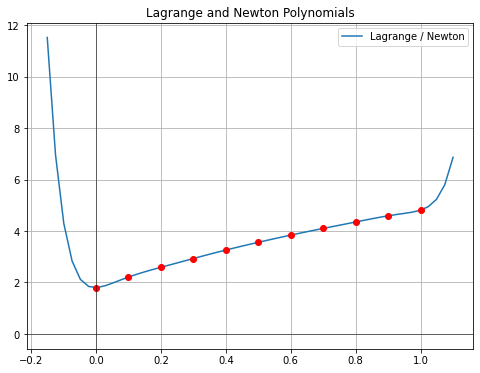

In [78]:
# plt.style.use('seaborn-poster')
X = np.linspace(-0.15, 1.1, 50, endpoint=True)
L = lambdify(x_var, lagrange)
L_y = L(X)
N = lambdify(x_var, newton)
N_y = N(X)

fig = plt.figure(figsize=(8, 6))
# lagrange function
plt.plot(X, L_y, label='Lagrange / Newton')

# print interpolation points
plt.plot(x, y, 'ko', c='red')
# axes
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)
plt.grid()

plt.title('Lagrange and Newton Polynomials')
plt.legend()
plt.show()

### Найдем значение в точке

Point!
x = 0.47
L(0.47) = 3.47265207970881
N(0.47) = 3.4726520797088036


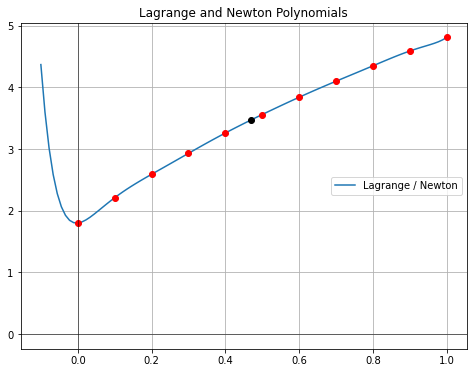

In [79]:
point_x = task.point
print(f"Point!\nx = {point_x}")

point_y_lagr = L(point_x)
point_y_newt = N(point_x)
print(f'L({point_x}) = {point_y_lagr}')
print(f'N({point_x}) = {point_y_newt}')

X = np.linspace(-0.1, 1, 100, endpoint=True)
L_y = L(X)

fig = plt.figure(figsize=(8, 6))
# lagrange function
plt.plot(X, L_y, label='Lagrange / Newton')

# print interpolation points
plt.plot(point_x, point_y_lagr, 'ko', c='black')
plt.plot(x, y, 'ko', c='red')
# axes
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)

plt.grid()

plt.title('Lagrange and Newton Polynomials')
plt.legend()
plt.show()

### Best approximation

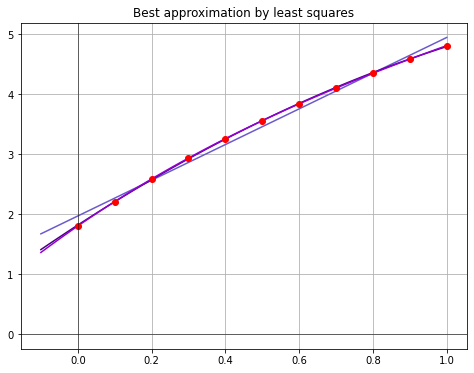

In [80]:
import numpy
x = np.array(task.x)
y = np.array(task.y)


x_var = symbols('x')
all_best = get_best_approx_poly(x, y)
fig = plt.figure(figsize=(8, 6))
for i, koef in enumerate(all_best):
    if i == 3:
        break
    col = ""
    if i == 0:
        col = 'slateblue'
    elif i == 1:
        col = 'indigo'
    elif i == 2:
        col = 'darkviolet'
    elif col == 3:
        col = 'violet'
    else:
        col = 'magenta'
        
    
    poly = numpy.polynomial.polynomial.Polynomial(koef)
    L = np.linspace(-0.1, 1)
    y = poly(L)
    plt.plot(L, y, color = col)
plt.grid()
plt.plot(task.x, task.y, 'ko', c='red')
plt.axvline(color="black", linewidth=0.5)
plt.axhline(color='black', linewidth=0.5)
plt.title("Best approximation by least squares")
plt.show()

In [81]:
numpy.polynomial.polynomial.Polynomial(all_best[0])

Polynomial([1.96863636, 2.97909091], domain=[-1,  1], window=[-1,  1])

### Polynomial of smallest degree with best approximation

In [82]:
numpy.polynomial.polynomial.Polynomial(all_best[1])

Polynomial([ 1.81706294,  3.98958042, -1.01048951], domain=[-1,  1], window=[-1,  1])